1-d interplation with RBF

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def true_fn(x):
    return x**2-x-np.cos(np.pi*x)

In [4]:
## Training set: sampling 100 points in the range of [-1,1]
X = np.linspace(-1,1,100)
y = true_fn(X)

In [20]:
(X.reshape(-1,1) - X.reshape(1,-1) ).shape

(100, 100)

In [5]:
X.reshape(-1,1)-X.reshape(1,-1)

array([[ 0.        , -0.02020202, -0.04040404, ..., -1.95959596,
        -1.97979798, -2.        ],
       [ 0.02020202,  0.        , -0.02020202, ..., -1.93939394,
        -1.95959596, -1.97979798],
       [ 0.04040404,  0.02020202,  0.        , ..., -1.91919192,
        -1.93939394, -1.95959596],
       ...,
       [ 1.95959596,  1.93939394,  1.91919192, ...,  0.        ,
        -0.02020202, -0.04040404],
       [ 1.97979798,  1.95959596,  1.93939394, ...,  0.02020202,
         0.        , -0.02020202],
       [ 2.        ,  1.97979798,  1.95959596, ...,  0.04040404,
         0.02020202,  0.        ]])

### Eculidean Distance calculation

In [6]:
def get_distance(x, xk):

    return np.sqrt((x.reshape(-1,1)-xk.reshape(1,-1))**2)

In [7]:
def gauss_rbf(radius):
    return np.exp(-(radius)**2)

In [8]:
class RBF:
        
    def fit(self,xk, yk):

        self.xk = xk
        self.yk = yk
        
        distance = get_distance(xk, xk)
      
        transformation = gauss_rbf(distance)
        self.w_ = np.linalg.solve(transformation, yk)
        

    def predict(self,xn):
        distance = get_distance(xn, X)
        transformation = gauss_rbf(distance)
        
        return transformation.dot(self.w_)

       

       

In [9]:
interp =RBF()

In [10]:
interp.fit(X, y)

In [11]:
y_pred = interp.predict(X)


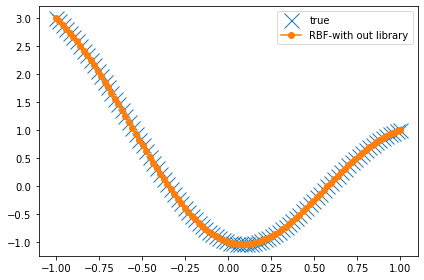

In [12]:
plt.plot(X, y, 'x', markersize=15, label='true')
plt.plot(X, y_pred, '-o', label='RBF-with out library')
plt.legend()
plt.tight_layout()
plt.show()

In [13]:
import numpy as np
from scipy import interpolate


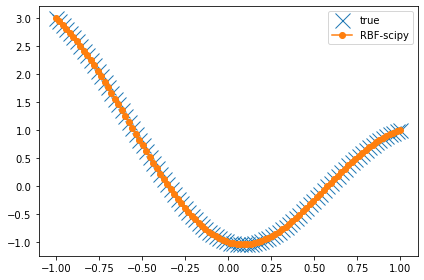

In [21]:
y =true_fn(X)


kind = 'gaussian'

newfunc = interpolate.Rbf(X,y, function=kind)
y_pred = newfunc(X)


plt.plot(X, true_fn(X), 'x', markersize=15, label='true')
plt.plot(X, y_pred, '-o', label='RBF-scipy')
plt.legend()
plt.tight_layout()
plt.show()